In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

## step-1 Read the dataset 

In [2]:
import pandas as pd
A = pd.read_csv ('training_set.csv',na_values=['','NA'],keep_default_na=False)
A

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
A.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 2 : Check missing values 

In [4]:
m = A.isna().sum()
m

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
A.shape

(1460, 81)

In [6]:
A.duplicated().sum()

0

In [7]:
A.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## Step 3 : seprate X and Y sales price


In [8]:
X = A.drop(columns = ['Id', 'SalePrice'])
Y = A[['SalePrice']]

In [9]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


## Step 4 : Apply preprocessing on X

In [11]:
cat =list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

## Step 5: EDA(Univariate , Bivariate)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Fireplaces', ylabel='Count'>

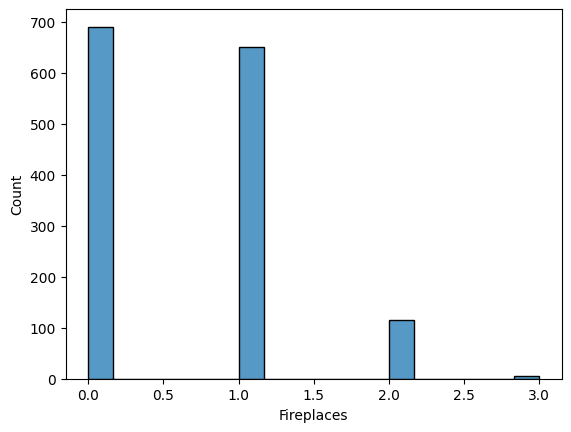

In [15]:
sns.histplot(data=A['Fireplaces'])

AttributeError: PathCollection.set() got an unexpected keyword argument 'X'

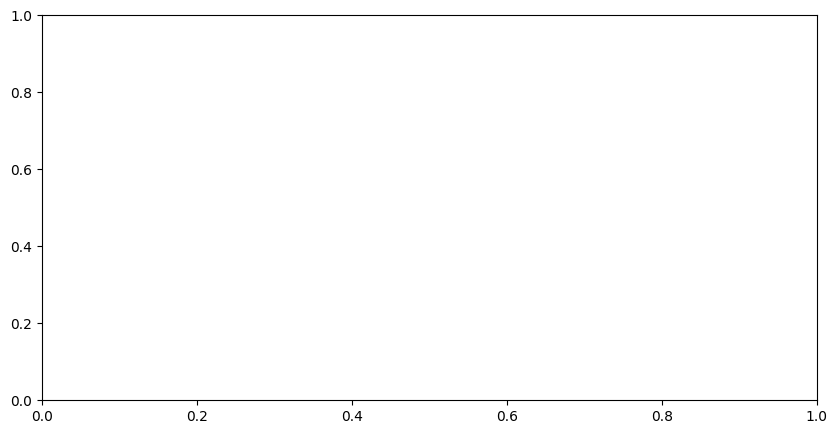

In [16]:
plt.figure(figsize=(10, 5)) 
sns.scatterplot(data= A, X = 'YrSold', Y = 'YearBuilt') 
plt.title('Yrsold Vs YearBuild')
plt.show()

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [18]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])

In [19]:
cat_pipe1 = Pipeline(steps = [('impute', SimpleImputer(strategy='most_frequent')),
                              ('ordinal',OrdinalEncoder())])

In [20]:
pre1 = ColumnTransformer([('num',num_pipe1, con),('cat',cat_pipe1, cat)]).set_output(transform='pandas')

In [21]:
X_pre1=pre1.fit_transform(X)
X_pre1.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,5.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [27]:
lr = LinearRegression()
sel = SequentialFeatureSelector (estimator=lr, 
                                 n_features_to_select='auto', 
                                 direction= 'forward')
sel.fit_transform(X_pre1, Y)
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__OpenPorchSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold', 'cat__Street',
       'cat__LandContour', 'cat__Utilities', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__BsmtQual', 'cat__BsmtCond',
       'cat__BsmtExposure', 'cat__HeatingQC', 'cat__KitchenQual',
       'cat__Functional', 'cat__GarageCond', 'cat__PavedDrive',
       'cat__Fence', 'cat__MiscFeature'], dtype=object)

In [28]:
len(imp_cols)

39

In [29]:
imp_cols[0]

'num__MSSubClass'

In [30]:
imp_cols[1]

'num__LotArea'

In [31]:
imp_cols[0].split('__')

['num', 'MSSubClass']

In [32]:
imp_cols[0].split('__')[1]

'MSSubClass'

In [33]:
sel_cols = []
for i in imp_cols:
    s = i.split('__')[1]
    sel_cols.append(s)

In [34]:
sel_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [35]:
X_sel = X[sel_cols]
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,GrLivArea,BsmtFullBath,KitchenAbvGr,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,GarageCond,PavedDrive,Fence,MiscFeature
0,60,8450,7,5,2003,196.0,706,1710,1,1,...,Gd,TA,No,Ex,Gd,Typ,TA,Y,NaN,NaN
1,20,9600,6,8,1976,0.0,978,1262,0,1,...,Gd,TA,Gd,Ex,TA,Typ,TA,Y,NaN,NaN
2,60,11250,7,5,2001,162.0,486,1786,1,1,...,Gd,TA,Mn,Ex,Gd,Typ,TA,Y,NaN,NaN
3,70,9550,7,5,1915,0.0,216,1717,1,1,...,TA,Gd,No,Gd,Gd,Typ,TA,Y,NaN,NaN
4,60,14260,8,5,2000,350.0,655,2198,1,1,...,Gd,TA,Av,Ex,Gd,Typ,TA,Y,NaN,NaN


In [36]:
X_sel.shape

(1460, 39)

## Feature selection completed

## Step 6: Create a final pipeline with one hot encoder

In [37]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [38]:
cat_sel

['Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [39]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
num_pipe2 = Pipeline(steps = [('impute',SimpleImputer(strategy='mean')),
                              ('scaler',StandardScaler())])

In [42]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore',
                                                 sparse_output = False))])

In [43]:
pre2= ColumnTransformer([('num', num_pipe2, con_sel), ('cat', cat_pipe2, cat_sel)]).set_output(transform = 'pandas')

In [44]:
X_sel_pre = pre2.fit_transform(X_sel) 
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__PavedDrive_P,cat__PavedDrive_Y,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__MiscFeature_Gar2,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.511418,0.575425,0.370333,1.107810,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.574410,1.171992,-0.482512,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.323060,0.092907,0.515013,1.107810,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.574410,-0.499274,0.383659,1.107810,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.364570,0.463568,1.299326,1.107810,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Step 6 : Apply Train test split

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2,
                                                random_state=21)

In [47]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__PavedDrive_P,cat__PavedDrive_Y,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__MiscFeature_Gar2,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,-0.574410,-0.973018,-1.497169,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-0.574410,0.500854,-0.364484,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,1.924104,0.274948,-0.356870,1.107810,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,1.309170,0.202570,0.638751,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,0.023903,-0.920380,0.073361,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [49]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__PavedDrive_P,cat__PavedDrive_Y,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__MiscFeature_Gar2,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
880,-0.872563,-0.350058,-0.795151,-0.517200,1.117235,-0.574410,1.176379,-0.809944,1.107810,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
605,0.073375,0.309002,0.651479,0.381743,-0.207594,0.400620,0.022723,0.895747,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1166,-0.872563,-0.004192,1.374795,-0.517200,1.216598,-0.175535,-0.973018,0.339875,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
216,-0.872563,-0.207142,0.651479,-0.517200,1.084115,0.899214,1.101808,-0.151273,1.107810,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
970,-0.163109,0.028380,-1.518467,-1.416142,-0.737526,-0.574410,-0.973018,-0.615769,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [50]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [51]:
xtrain.shape

(1168, 145)

## Step 7: Bluid and evaluate the model

In [52]:

model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

## Step 8 - Evaluate the model

In [53]:
model.score(xtrain, ytrain)

0.9255778330766109

In [54]:
model.score(xtest, ytest)

0.8011550773030807

In [55]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

In [56]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [57]:
ypred_train[0:5]

array([[ 56741.],
       [124731.],
       [153931.],
       [219238.],
       [217215.]])

In [58]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [59]:
ypred_test[0:5]

array([[183515.],
       [201963.],
       [231307.],
       [215463.],
       [ 80803.]])

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [61]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print all the results
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root mean squared error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'Mean Absolute Percentage Error : {mape:.4f}')
    print(f'R2 Score : {r2:.4f}')

In [62]:
evaluate_model(model, xtrain, ytrain)

Mean Squared Error : 460593248.23
Root mean squared error : 21461.44
Mean Absolute Error : 14606.48
Mean Absolute Percentage Error : 0.0879
R2 Score : 0.9256


In [63]:
evaluate_model(model, xtest, ytest)

Mean Squared Error : 1347634077.37
Root mean squared error : 36710.14
Mean Absolute Error : 18384.42
Mean Absolute Percentage Error : 0.1072
R2 Score : 0.8012


## model - Redge

In [65]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=2)
model2.fit(xtrain, ytrain)

Ridge(alpha=2)

In [66]:
model2.score(xtrain, ytrain)

0.9051403658846243

In [67]:
model2.score(xtest, ytest)

0.837877692711439

In [68]:
from sklearn.model_selection import cross_val_score
r2_scores_ridge = cross_val_score(model2, xtrain, ytrain, cv=5, scoring = 'r2')
r2_scores_ridge

array([0.64779503, 0.86025079, 0.90287955, 0.86536517, 0.92877564])

In [69]:
r2_scores_ridge.mean()

0.8410132371970033

In [70]:
mae_scores_ridge= cross_val_score(model2, xtrain, ytrain, cv=5, scoring = 'neg_mean_absolute_error')

In [71]:
mae_scores_ridge

array([-19280.76927636, -18277.37636158, -16089.63990579, -19714.05503358,
       -15483.93111635])

In [72]:
mae_scores_ridge.mean()

-17769.154338734057

In [74]:
r2_scores_linear = cross_val_score(model2, xtrain, ytrain, cv=5, scoring = 'r2')
r2_scores_linear

array([0.64779503, 0.86025079, 0.90287955, 0.86536517, 0.92877564])

In [75]:
r2_scores_linear.mean()

0.8410132371970033

## step -8: Apply Ridge Lasso with GridSearchCV

In [76]:
import numpy as np
alphas = np.arange(start=0.1, stop=100, step= 0.1)
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [77]:
params = {'alpha': alphas}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [82]:
from sklearn.model_selection import GridSearchCV
model_ridge = Ridge()
gscv_ridge= GridSearchCV(model_ridge, param_grid = params, cv=5,scoring = 'r2')
gscv_ridge.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [83]:
gscv_ridge.best_params_

{'alpha': 21.1}

In [84]:
gscv_ridge.best_score_

0.8462959370086441

In [85]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=21.1)

In [87]:
best_ridge.score(xtrain, ytrain)

0.8835571237174773

In [88]:
best_ridge.score(xtest, ytest)

0.830584096427463

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [90]:
def evaluate_model(model, X, Y):
    Ypred = model.predict(X)
    mse = mean_squared_error(Y, Ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(Y, Ypred)
    mape = mean_absolute_percentage_error(Y, Ypred)
    r2 = r2_score(Y, Ypred)
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root mean Squared Error: {rmse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean absolute percentage Error: {mape:.2f}')
    print(f'R2 Score: {r2 :.4f}')

In [91]:
evaluate_model(best_ridge, xtrain, ytrain)

Mean Squared Error : 720656288.81
Root mean Squared Error: 26845.04
Mean Absolute Error: 16110.13
Mean absolute percentage Error: 0.10
R2 Score: 0.8836


In [92]:
evaluate_model(best_ridge, xtest, ytest)

Mean Squared Error : 1148184433.41
Root mean Squared Error: 33884.87
Mean Absolute Error: 17665.46
Mean absolute percentage Error: 0.10
R2 Score: 0.8306


# Model -Lasso

In [93]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha =1)
model3.fit(xtrain, ytrain)

Lasso(alpha=1)

In [94]:
model3.score(xtrain, ytrain)

0.9255662573162222

In [95]:
model3.score(xtest, ytest)

0.8056977677576639

In [96]:
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [98]:
model_lasso = Lasso()
gscv_lasso = GridSearchCV(model_lasso, param_grid=params, cv=5, scoring = 'r2')
gscv_lasso.fit(xtrain,ytrain )

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [99]:
gscv_lasso.best_params_

{'alpha': 99.9}

In [100]:
gscv_lasso.best_score_

0.8543782476496858

In [101]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=99.9)

In [103]:
best_lasso.score(xtrain, ytrain)

0.9158752668385003

In [105]:
best_lasso.score(xtest, ytest)

0.8224697279016915

In [107]:
evaluate_model(best_lasso, xtrain, ytrain)

Mean Squared Error : 520641708.04
Root mean Squared Error: 22817.57
Mean Absolute Error: 15384.13
Mean absolute percentage Error: 0.09
R2 Score: 0.9159


In [108]:
evaluate_model(best_lasso, xtest, ytest)

Mean Squared Error : 1203178040.45
Root mean Squared Error: 34686.86
Mean Absolute Error: 17493.73
Mean absolute percentage Error: 0.10
R2 Score: 0.8225


# After Comapring above Ridge model has higest test score of 0.8306 when compared with Lasso

## Choose ridge model for out of sample prediction

In [111]:
best_ridge

Ridge(alpha=21.1)

In [112]:
Xnew = pd.read_csv('sample_set.csv', na_values=['', 'NA'], keep_default_na = False)
Xnew

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [115]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
                                  'ScreenPorch', 'PoolArea', 'YrSold']),
                                ('...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'GarageCond',
                                  'PavedDrive', 'Fence', 'MiscFeature'])])

In [117]:
Xnew_pre = pre2.transform(Xnew)
Xnew_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__PavedDrive_P,cat__PavedDrive_Y,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__MiscFeature_Gar2,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.574410,0.053428,-1.179256,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.023903,1.051363,-0.354966,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.574410,0.761852,0.216136,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.463612,0.347326,0.168544,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.574410,-0.396190,-0.448246,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.438219,-0.859988,-1.518467,1.280685,-0.041991,-0.574410,-0.973018,-0.806136,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1455,2.438219,-0.864197,-1.518467,-0.517200,-0.041991,-0.574410,-0.420316,-0.806136,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,-0.872563,0.950423,-0.795151,1.280685,-0.373198,-0.574410,1.711535,-0.554851,1.107810,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.664586,-0.007600,-0.795151,-0.517200,0.686666,-0.574410,-0.233889,-1.038384,-0.819964,-0.211454,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [120]:
A_final = Xnew[['YearBuilt', 'LotArea']]
A_final

,YearBuilt,LotArea
0,1961,11622
1,1958,14267
2,1997,13830
3,1998,9978
4,1992,5005
...,...,...
1454,1970,1936
1455,1970,1894
1456,1960,20000
1457,1992,10441


In [121]:
preds = best_ridge.predict(Xnew_pre)
preds

array([[117117.63900432],
       [152527.3849707 ],
       [166748.32054825],
       ...,
       [176594.5642026 ],
       [107356.87300521],
       [220732.37914301]])

In [122]:
A_final['Weight_pred'] = preds

In [123]:
A_final

,YearBuilt,LotArea,Weight_pred
0,1961,11622,117117.639004
1,1958,14267,152527.384971
2,1997,13830,166748.320548
3,1998,9978,179768.931797
4,1992,5005,196965.263834
...,...,...,...
1454,1970,1936,78625.031246
1455,1970,1894,84518.599538
1456,1960,20000,176594.564203
1457,1992,10441,107356.873005


In [124]:
A_final.to_csv('RidgeResults.csv', index=False)